In [1]:
import os
import fnmatch
import pandas as pd
from os.path import isfile, join
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# Topological charge

    In this script I will analyze the topological charge in a Cairo Lattice if we increse linearly up from 0 mT to 50 mT with a rate of 0.0333 mT/s (1500 s). Then we are Analyzing the output data of Script-1.2.

In [2]:
data_directory = "/home/carolina/CairoLattice_ACI_PROJECT/Scripts/Output_Script-8.1"

In [3]:
#slope = 50/1500
#slope

In [4]:
Cairo = []
for file in os.listdir(data_directory):
    if fnmatch.fnmatch(file, 'ACI_CairoLattice_25mT-2500s_PeriodicBound_l10_exp*.dat'):
        print(file)
        Cairo.append(pd.read_csv(join(data_directory,file), sep = "\t", index_col = [0,1])) 
        
keys_Cairo = []
for i in range(len(Cairo)):
    keys_Cairo.append(i)

ACI_CairoLattice_25mT-2500s_PeriodicBound_l10_exp0.dat
ACI_CairoLattice_25mT-2500s_PeriodicBound_l10_exp8.dat
ACI_CairoLattice_25mT-2500s_PeriodicBound_l10_exp1.dat
ACI_CairoLattice_25mT-2500s_PeriodicBound_l10_exp3.dat
ACI_CairoLattice_25mT-2500s_PeriodicBound_l10_exp4.dat
ACI_CairoLattice_25mT-2500s_PeriodicBound_l10_exp2.dat
ACI_CairoLattice_25mT-2500s_PeriodicBound_l10_exp7.dat
ACI_CairoLattice_25mT-2500s_PeriodicBound_l10_exp9.dat
ACI_CairoLattice_25mT-2500s_PeriodicBound_l10_exp6.dat
ACI_CairoLattice_25mT-2500s_PeriodicBound_l10_exp5.dat


In [5]:
Cairo_exp = pd.concat(Cairo, keys = keys_Cairo)

In [6]:
Cairo_exp.index.names = ['Exp', 'frame', 'id']

In [7]:
Cairo_exp

x           y  coordination  charge        dx  \
Exp frame  id                                                             
0   0      0       0.000000   -9.772898             3      -1 -1.732051   
           1       0.000000    9.772898             3       3  0.000000   
           2       0.000000 -473.292807             3       3  0.000000   
           3      23.174375 -486.690558             4      -2  1.000000   
           4       0.000000 -453.747202             3       1  0.000000   
...                     ...         ...           ...     ...       ...   
9   250000 1232   92.704002 -639.155048             3       1  0.000000   
           1233  658.700809 -602.575989             3      -1  2.000000   
           1234  639.155115 -602.575989             3      -1  1.000000   
           1235  639.155315 -509.872009             3       1  2.000000   
           1236  658.700703 -509.872009             3       1  1.000000   

                           dy  
Exp frame  id                  
0   0      0     1.000000e+00  
           1    -3.747952e-07  
           2     3.747952e-07  
           3     1.732051e+00  
           4    -2.000000e+00  
...                       ...  
9   250000 1232 -2.000000e+00  
           1233  0.000000e+00  
           1234 -1.732051e+00  
           1235  0.000000e+00  
           1236  1.732051e+00  

[3104870 rows x 6 columns]

In [8]:
Cairo_exp = Cairo_exp.query('coordination != 2')

In [9]:
Cairo_exp['time'] = (Cairo_exp.index.get_level_values('frame'))/100

/home/carolina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## 1. Total topological charge

In [10]:
Topo_q = Cairo_exp.groupby('time').sum()/Cairo_exp.groupby('time').count()

In [11]:
Topo_q

,x,y,coordination,charge,dx,dy
time,,,,,,
0.0,440.343969,-440.343967,3.310939,0.005340,0.020416,-0.019201
10.0,440.343969,-440.343967,3.310939,0.005340,0.020806,-0.017995
20.0,440.343969,-440.343967,3.310939,0.005168,0.019623,-0.017564
30.0,440.343969,-440.343967,3.310939,0.004996,0.020352,-0.016726
40.0,440.343969,-440.343967,3.310939,0.004823,0.017959,-0.014165
...,...,...,...,...,...,...
2460.0,440.343969,-440.343967,3.310939,-0.007580,0.006921,-0.014110
2470.0,440.343969,-440.343967,3.310939,-0.005685,0.006246,-0.017171
2480.0,440.343969,-440.343967,3.310939,-0.008269,0.008656,-0.022111


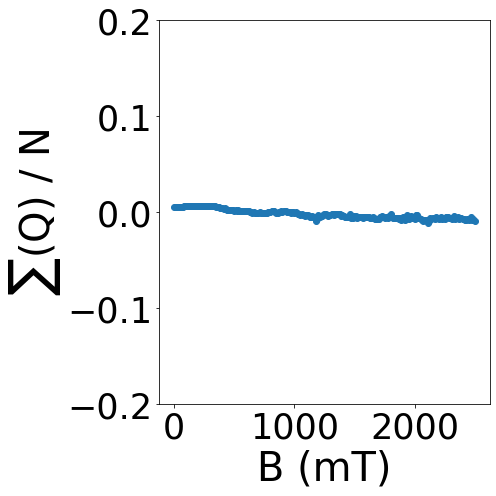

In [12]:
fig, ax1 = plt.subplots(figsize=(7,7))

plt.plot(Topo_q.index.get_level_values('time'), Topo_q.charge, 'o')

ax1.tick_params(axis='y', labelsize=35)
ax1.tick_params(axis='x', labelsize=35)  

ax1.set_xlabel('B (mT)', size = 40)
ax1.set_ylabel('$\sum$(Q) / N', size = 40)
ax1.set_ylim(-0.2,0.2)

plt.tight_layout()

### 2. Total topological charge of each sublattice

In [13]:
Cairo_exp.groupby(['time','coordination']).sum()


x             y  charge          dx  \
time   coordination                                                   
0.0    3             3.522752e+06 -3.522752e+06      50  188.842375   
       4             1.589642e+06 -1.589641e+06      12   48.182120   
10.0   3             3.522752e+06 -3.522752e+06      48  195.110324   
       4             1.589642e+06 -1.589641e+06      14   46.450070   
20.0   3             3.522752e+06 -3.522752e+06      48  183.110324   
...                           ...           ...     ...         ...   
2480.0 4             1.589642e+06 -1.589641e+06     726   20.320507   
2490.0 3             3.522752e+06 -3.522752e+06    -796  122.588464   
       4             1.589642e+06 -1.589641e+06     708   10.535904   
2500.0 3             3.522752e+06 -3.522752e+06    -834  -10.282022   
       4             1.589642e+06 -1.589641e+06     718  -65.693573   

                             dy  
time   coordination              
0.0    3            -194.961508  
       4             -27.961509  
10.0   3            -181.961508  
       4             -26.961508  
20.0   3            -175.961509  
...                         ...  
2480.0 4             -80.621778  
2490.0 3            -158.837172  
       4             -37.176913  
2500.0 3             -92.124350  
       4              -2.856401  

[502 rows x 5 columns]

In [14]:
df1 = Cairo_exp.groupby(['time','coordination']).sum()/Cairo_exp.groupby(['time','coordination']).count()


In [15]:
err = Cairo_exp.groupby(['time','coordination']).std()/np.sqrt(Cairo_exp.groupby(['time','coordination']).count())

In [16]:
df = df1['charge'].to_frame()
df['err'] = err['charge']

In [17]:
df

charge       err
time   coordination                    
0.0    3             0.006250  0.019324
       4             0.003324  0.032837
10.0   3             0.006000  0.019321
       4             0.003878  0.032832
20.0   3             0.006000  0.019334
...                       ...       ...
2480.0 4             0.201108  0.012977
2490.0 3            -0.099500  0.011354
       4             0.196122  0.012748
2500.0 3            -0.104250  0.011348
       4             0.198892  0.012796

[502 rows x 2 columns]

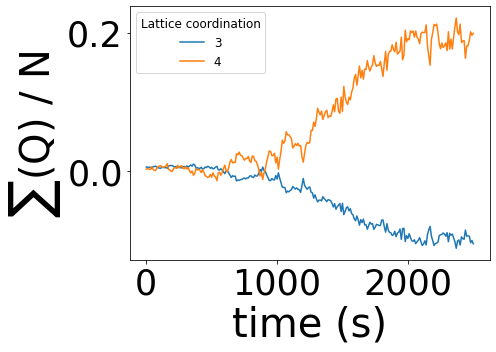

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(7,5))

for typ_m, mtype in df.groupby('coordination'):
    
    #plt.errorbar(mtype.index.get_level_values("time"), mtype["charge"],yerr = mtype['err'],fmt ='-', label = typ_m)
    plt.plot(mtype.index.get_level_values("time"), mtype["charge"],'-', label = typ_m)

    
ax.tick_params(axis='y', labelsize=35)
ax.tick_params(axis='x', labelsize=35) 
ax.legend(fontsize = 12, title= 'Lattice coordination', title_fontsize = 12, ncol = 1)


ax.set_xlabel('time (s)', size = 40)
ax.set_ylabel('$\sum$(Q) / N', size = 40)


plt.tight_layout()
#plt.savefig('ChargeTransfer.png', bbox_inches='tight')